In [43]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define paths and constants
results_dir = "../results/bispectrum_lmax_5"
lmax = int(results_dir.split("_")[-1])
num_batches = 24

# Load all batch results
all_results = []
batch_ranges = [
    (0, 417), (417, 834), (834, 1251), (1251, 1668), (1668, 2085),
    (2085, 2502), (2502, 2919), (2919, 3336), (3336, 3753), (3753, 4170),
    (4170, 4587), (4587, 5004), (5004, 5421), (5421, 5838), (5838, 6255),
    (6255, 6672), (6672, 7089), (7089, 7506), (7506, 7923), (7923, 8340),
    (8340, 8757), (8757, 9174), (9174, 9591), (9591, 10000)
]

for start_idx, end_idx in batch_ranges[:num_batches]:
    filename = f"{results_dir}/qm9_inversion_bispectrum_lmax_{lmax}_batch_{start_idx}_{end_idx}.pkl"
    try:
        with open(filename, "rb") as f:
            batch_results = pickle.load(f)
            all_results.append(batch_results)
        print(f"Loaded results from {filename}")
    except FileNotFoundError:
        print(f"Warning: File not found: {filename}")
    except Exception as e:
        print(f"Error loading {filename}: {str(e)}")

if not all_results:
    print("No result files were loaded. Exiting.")
    exit()

# Merge results from all batches
merged_results = {
    "best_preds": [],
    # "best_radial_mae_histories": [],
    # "best_angular_mae_histories": [],
    # "all_final_radial_maes": [],
    # "all_final_angular_maes": [],
    "all_final_preds": [],
    "processing_time": 0,
    # "num_envs": 0,
    # "num_inits": all_results[0]["num_inits"],
    # "lmax": lmax
}

for result in all_results:
    merged_results["best_preds"].extend(result["best_preds"])
    # merged_results["best_radial_mae_histories"].extend(result["best_radial_mae_histories"])
    # merged_results["best_angular_mae_histories"].extend(result["best_angular_mae_histories"])
    # merged_results["all_final_radial_maes"].extend(result["all_final_radial_maes"])
    # merged_results["all_final_angular_maes"].extend(result["all_final_angular_maes"])
    merged_results["all_final_preds"].extend(result["all_final_preds"])
    merged_results["processing_time"] += result["processing_time"]
    # merged_results["num_envs"] += result["num_envs"]

# Save the merged results
merged_output_file = f"{results_dir}/qm9_inversion_bispectrum_lmax_{lmax}_merged.pkl"
with open(merged_output_file, "wb") as f:
    pickle.dump(merged_results, f)
print(f"Saved merged results to {merged_output_file}")

Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_0_417.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_417_834.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_834_1251.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_1251_1668.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_1668_2085.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_2085_2502.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_2502_2919.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_2919_3336.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_3336_3753.pkl
Loaded results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_batch_3753_4170.p

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define paths and constants
results_dir = "../results/bispectrum_lmax_5"
lmax = int(results_dir.split("_")[-1])

# Load the merged results directly
merged_output_file = f"{results_dir}/qm9_inversion_bispectrum_lmax_{lmax}_merged.pkl"
try:
    with open(merged_output_file, "rb") as f:
        merged_results = pickle.load(f)
    print(f"Loaded merged results from {merged_output_file}")
except FileNotFoundError:
    print(f"Error: File not found: {merged_output_file}")
    exit()
except Exception as e:
    print(f"Error loading {merged_output_file}: {str(e)}")
    exit()

# # For compatibility with the plotting code
# if "all_mae_values" not in merged_results:
#     merged_results["all_mae_values"] = merged_results["best_radial_mae_histories"]

# # Calculate average curves across all environments
# # First, ensure all histories have the same length
# max_len = max(len(hist) for hist in merged_results["best_radial_mae_histories"])
# radial_histories_padded = []
# angular_histories_padded = []

# for hist in merged_results["best_radial_mae_histories"]:
#     if len(hist) < max_len:
#         # Pad with NaN values if needed
#         padded = hist + [np.nan] * (max_len - len(hist))
#     else:
#         padded = hist
#     radial_histories_padded.append(padded)

# for hist in merged_results["best_angular_mae_histories"]:
#     if len(hist) < max_len:
#         padded = hist + [np.nan] * (max_len - len(hist))
#     else:
#         padded = hist
#     angular_histories_padded.append(padded)

# # Convert to numpy arrays for easier calculations
# radial_histories_arr = np.array(radial_histories_padded)
# angular_histories_arr = np.array(angular_histories_padded)

# # Calculate average at each iteration, ignoring NaNs
# avg_radial_mae = np.nanmean(radial_histories_arr, axis=0)
# avg_angular_mae = np.nanmean(angular_histories_arr, axis=0)

# # Plot Radial MAE values
# fig, ax = plt.subplots(figsize=(10, 8))

# # Use a set of highly distinguishable colors
# colors = ['#000000', '#FF0000', '#0000FF', '#008000', '#FF00FF', '#800000', 
#           '#000080', '#008080', '#800080', '#FF8000', '#00FF00', '#0080FF',
#           '#FF0080', '#800080', '#FF8080', '#8000FF', '#00FF80', '#80FF00',
#           '#FF00FF', '#000000']  # High contrast colors

# # Plot each environment's MAE values
# step = 50  # Plot every 50 iterations to reduce noise
# num_envs_to_plot = min(len(merged_results["all_mae_values"]), 200)  # Limit to 200 environments for readability

# for i in range(num_envs_to_plot):
#     mae_values = merged_results["all_mae_values"][i]
    
#     # Get indices for every step-th point
#     indices = list(range(0, len(mae_values), step))
    
#     # Make sure the last point is included
#     if (len(mae_values) - 1) not in indices:
#         indices.append(len(mae_values) - 1)
    
#     # Get x and y values for plotting
#     x_values = indices
#     y_values = [mae_values[j] for j in indices]
    
#     line = ax.plot(x_values, y_values, marker='o', linestyle='-', 
#             alpha=0.5, color=colors[i % len(colors)])

# # Plot the average curve for all environments (not just the 200 plotted)
# # Use step to reduce number of points for clarity
# avg_indices = list(range(0, len(avg_radial_mae), step))
# if (len(avg_radial_mae) - 1) not in avg_indices:
#     avg_indices.append(len(avg_radial_mae) - 1)

# avg_x = avg_indices
# avg_y = [avg_radial_mae[j] for j in avg_indices]

# # Plot average with thick black line
# ax.plot(avg_x, avg_y, color='black', linewidth=3, marker='s', label='Average (all environments)')

# ax.set_title(f'Radial MAE Values for Environments (lmax={lmax})')
# ax.set_xlabel('Iteration')
# ax.set_ylabel('Radial MAE Value')
# ax.legend(loc='upper right')
# ax.grid(True)

# # Set integer x-axis ticks
# ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# plt.tight_layout()
# plt.savefig(f"{results_dir}/radial_mae_lmax_{lmax}_merged.png")
# plt.show()

# # Also create a plot for angular MAE
# fig, ax = plt.subplots(figsize=(10, 8))

# # Plot each environment's angular MAE values
# for i in range(num_envs_to_plot):
#     mae_values = merged_results["best_angular_mae_histories"][i]
    
#     # Get indices for every step-th point
#     indices = list(range(0, len(mae_values), step))
    
#     # Make sure the last point is included
#     if (len(mae_values) - 1) not in indices:
#         indices.append(len(mae_values) - 1)
    
#     # Get x and y values for plotting
#     x_values = indices
#     y_values = [mae_values[j] for j in indices]
    
#     line = ax.plot(x_values, y_values, marker='o', linestyle='-', 
#             alpha=0.5, color=colors[i % len(colors)])

# # Plot the average angular MAE curve for all environments
# avg_indices = list(range(0, len(avg_angular_mae), step))
# if (len(avg_angular_mae) - 1) not in avg_indices:
#     avg_indices.append(len(avg_angular_mae) - 1)

# avg_x = avg_indices
# avg_y = [avg_angular_mae[j] for j in avg_indices]

# # Plot average with thick black line
# ax.plot(avg_x, avg_y, color='black', linewidth=3, marker='s', label='Average (all environments)')

# ax.set_title(f'Angular MAE Values for Environments (lmax={lmax})')
# ax.set_xlabel('Iteration')
# ax.set_ylabel('Angular MAE Value')
# ax.legend(loc='upper right')
# ax.grid(True)

# # Set integer x-axis ticks
# ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# plt.tight_layout()
# plt.savefig(f"{results_dir}/angular_mae_lmax_{lmax}_merged.png")
# plt.show()

# # Print some statistics
# print(f"\nProcessed {merged_results['num_envs']} environments total")
# print(f"Average processing time per environment: {merged_results['processing_time']/merged_results['num_envs']:.2f}s")

# # Calculate and print average final MAE values
# final_radial_maes = [history[-1] for history in merged_results["best_radial_mae_histories"]]
# final_angular_maes = [history[-1] for history in merged_results["best_angular_mae_histories"]]

# print(f"Average final radial MAE: {np.nanmean(final_radial_maes):.6f}")
# print(f"Average final angular MAE: {np.nanmean(final_angular_maes):.6f}")
# print(f"Median final radial MAE: {np.nanmedian(final_radial_maes):.6f}")
# print(f"Median final angular MAE: {np.nanmedian(final_angular_maes):.6f}")

Loaded merged results from ../results/bispectrum_lmax_5/qm9_inversion_bispectrum_lmax_5_merged.pkl


In [2]:
with open('../data/qm9_local_envs_10000.pkl', 'rb') as f:
    local_envs = pickle.load(f)

print(f"Number of local environments: {len(local_envs)}")

Number of local environments: 10000


In [3]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_dir = os.path.join(project_root, 'src')
sys.path.append(src_dir)
import spectra as spectra
from utils.plotters import visualize_signal
from utils.alignment import sample_uniform_quaternion, find_best_random_quaternion, align_signals, choose_best_quaternion, loss_fn, quaternion_rotation_distance, rotate_points_quaternion, point_distance, find_best_random_quaternions
from utils.geometries import trigonal_plane, tetrahedron, trigonal_bipyramid
import jax
import jax.numpy as jnp
jax.config.update("jax_enable_x64", True)
import numpy as np
from scipy.spatial.transform import Rotation
import itertools


def align_predicted_geometry(true_geometry: np.ndarray,
                             predicted_geometry: np.ndarray
                            ) -> tuple[np.ndarray, float]:
    """
    Aligns `predicted_geometry` onto `true_geometry` using only a rigid-body rotation.
    Points are first sorted by distance from the origin, normalized to unit radius,
    then each pair of corresponding direction‐vectors is scaled by a different
    random weight (to break any geometric symmetry) before computing the optimal
    rotation. Assumes both inputs are centered at the origin.

    Parameters
    ----------
    true_geometry : (N, 3) array_like
        Reference point cloud, centered at the origin.
    predicted_geometry : (N, 3) array_like
        Point cloud to align, also centered.

    Returns
    -------
    aligned_predicted : (N, 3) ndarray
        The `predicted_geometry` rotated to best match `true_geometry`.
    rmsd : float
        The RMSD between the (weighted) direction‐vectors after optimal alignment.
    """
    # Convert inputs
    true_pts = np.asarray(true_geometry, dtype=float)
    pred_pts = np.asarray(predicted_geometry, dtype=float)
    if true_pts.shape != pred_pts.shape or true_pts.shape[1] != 3:
        raise ValueError("Both inputs must have shape (N, 3)")

    # Compute norms (radii) without sorting
    true_radii = np.linalg.norm(true_pts, axis=1)
    pred_radii = np.linalg.norm(pred_pts, axis=1)
    
    # Normalize to unit vectors directly without reordering
    true_dirs = true_pts / true_radii[:, None]
    pred_dirs = pred_pts / pred_radii[:, None]    

    # Generate a different random weight for each point to break symmetry
    # (e.g. uniform on [0,1) or any other distribution)
    weights = np.random.rand(true_dirs.shape[0], 1)

    # Scale both sets by the same per-point weights
    true_weighted = true_dirs * weights
    pred_weighted = pred_dirs * weights

    # Compute optimal rotation on weighted directions
    rot, rmsd = Rotation.align_vectors(true_weighted, pred_weighted)

    # Apply rotation back to the original predicted points
    pred_rotated = rot.apply(pred_pts)

    return pred_rotated, rmsd


def alignment_mae(true_geometry, predicted_geometry):

    if len(true_geometry) != len(predicted_geometry):
        return float('inf'), None

    # Try all permutations of the predicted geometry and select the one with lowest RMSD
    best_error = float('inf')
    best_aligned = None
    
    # Get all permutations of indices
    n_points = predicted_geometry.shape[0]
    for perm in itertools.permutations(range(n_points)):
        perm_predicted = predicted_geometry[list(perm)]
        aligned, _ = align_predicted_geometry(true_geometry, perm_predicted)
        error = jnp.mean(jnp.linalg.norm(aligned - true_geometry, axis=1))
        # error = np.mean(np.abs(aligned - true_geometry), axis=1)
        if error < best_error:
            best_error = error
            best_aligned = aligned

    return best_error, best_aligned


def radius_mae_fast(a1: np.ndarray, a2: np.ndarray) -> float:
    """MAE of sorted non-zero radii; returns 0.0 if both empty."""
    r1 = np.linalg.norm(a1, axis=1); r2 = np.linalg.norm(a2, axis=1)
    r1, r2 = np.sort(r1[r1>1e-10]), np.sort(r2[r2>1e-10])
    if len(r1)==0 and len(r2)==0: return 0.0
    if len(r1)!=len(r2): return np.nan
    return float(np.mean(np.abs(r1 - r2)))


def angular_mae_fast(a1: np.ndarray, a2: np.ndarray) -> float:
    """MAE of sorted pairwise angles; returns 0.0 if both empty."""

    # Filter out points at or very near the origin
    mask1 = np.linalg.norm(a1, axis=1) > 1e-10
    mask2 = np.linalg.norm(a2, axis=1) > 1e-10
    
    a1_filtered = a1[mask1]
    a2_filtered = a2[mask2]
    
    # Handle edge cases
    if len(a1_filtered) == 0 and len(a2_filtered) == 0:
        return 0.0
    if len(a1_filtered) < 2 or len(a2_filtered) < 2:
        return 0.0
    
    # Normalize to get unit vectors
    u1 = a1_filtered / np.linalg.norm(a1_filtered, axis=1, keepdims=True)
    u2 = a2_filtered / np.linalg.norm(a2_filtered, axis=1, keepdims=True)
    
    # Compute pairwise angles within each set
    dot_products1 = np.clip(u1 @ u1.T, -1.0, 1.0)
    np.fill_diagonal(dot_products1, 1.0)  # Avoid numerical issues
    angles1 = np.arccos(dot_products1)
    
    dot_products2 = np.clip(u2 @ u2.T, -1.0, 1.0)
    np.fill_diagonal(dot_products2, 1.0)  # Avoid numerical issues
    angles2 = np.arccos(dot_products2)
    
    # Flatten and sort angles (upper triangle only to avoid duplicates)
    angles1_flat = angles1[np.triu_indices(len(u1), k=1)]
    angles2_flat = angles2[np.triu_indices(len(u2), k=1)]
    
    # Check if we have the same number of angles
    if len(angles1_flat) != len(angles2_flat):
        return np.nan
    
    angles1_sorted = np.sort(angles1_flat)
    angles2_sorted = np.sort(angles2_flat)
    
    # Compute MAE between sorted angles
    return float(np.mean(np.abs(angles1_sorted - angles2_sorted)))

In [4]:
import e3nn_jax as e3nn
import jax
import jax.numpy as jnp
import chex
from tqdm import tqdm


LMAX = 5


def sum_of_diracs(
    vectors: chex.Array, 
    lmax: int, 
    values: chex.Array = None
) -> e3nn.IrrepsArray:
    """
    Given a set of vectors, computes the sum of Dirac delta functions.

    Parameters:
        vectors (chex.Array): Input array of vectors.
        lmax (int): Maximum degree of spherical harmonics.
        values (chex.Array, optional): Values at each vector. 
            If not provided, the norm of each vector is used.

    Returns:
        e3nn.IrrepsArray: The sum of Dirac delta functions.
    """
    if values is None:
        values = jnp.linalg.norm(vectors, axis=1)
    return e3nn.sum(e3nn.s2_dirac(vectors, lmax, p_val=1, p_arg=-1) * values[:, None], axis=0)



def bispectrum(x: e3nn.IrrepsArray) -> e3nn.IrrepsArray:
    """
    Computes the bispectrum of an array of irreducible representations.

    Parameters:
        x (e3nn.IrrepsArray): Input array of irreps.

    Returns:
        e3nn.IrrepsArray: The bispectrum of the input array.
    """
    rtp = e3nn.reduced_symmetric_tensor_product_basis(x.irreps, 3, keep_ir=['0o', '0e'])
    return e3nn.IrrepsArray(rtp.irreps, jnp.einsum("i,j,k,ijkz->z", x.array, x.array, x.array, rtp.array)).array


@jax.jit
def compute_bispectrum(env):
    """Compute bispectrum for an (M×3) array, zeros allowed."""
    bis = bispectrum(sum_of_diracs(env, LMAX)) 
    normalized_bispectrum = bis / jnp.linalg.norm(bis)
    return normalized_bispectrum




def stack_points(points: np.ndarray) -> jnp.ndarray:
    """
    Cluster points by alignment (cosine > 0.866), sum and threshold
    with half the max norm. Returns (K×3) JAX array or empty.
    """
    norms = np.linalg.norm(points, axis=1, keepdims=True)
    valid = norms[:,0] > 0
    pts = points.copy()
    pts[valid] /= norms[valid]
    D = pts @ pts.T
    used = np.ones(len(points),bool)
    clusters = []
    while used.any():
        i = np.argmax(used)
        aligned = (D[i] > 0.866) & used
        if not aligned.any(): break
        clusters.append(points[aligned].sum(0))
        used[aligned] = False
    if not clusters:
        return jnp.zeros((0,3), jnp.float64)
    C = np.stack(clusters)
    norms = np.linalg.norm(C, axis=1)
    thresh = 0.5 * norms.max()
    C = C[norms >= thresh]
    return jnp.array(C, jnp.float64)



best_final_losses = []
best_final_maes = []
best_radial_maes = []
best_angular_maes = []
aligned_predicted_geometries = []

for i in tqdm(range(len(merged_results["best_preds"]))):
    # Compute bispectrum loss
    true_bs = compute_bispectrum(jnp.array(local_envs[i]))
    pred_bs = compute_bispectrum(jnp.array(merged_results["best_preds"][i]))
    best_final_losses.append(jnp.mean(jnp.abs(true_bs - pred_bs)))
    
    # Compute alignment MAE
    mae, aligned_predicted_geometry = alignment_mae(np.array(local_envs[i]), merged_results["best_preds"][i])
    best_final_maes.append(mae)
    aligned_predicted_geometries.append(aligned_predicted_geometry)
    
    # Compute radial MAE
    best_radial_maes.append(radius_mae_fast(np.array(local_envs[i]), merged_results["best_preds"][i]))
    
    # Compute angular MAE
    best_angular_maes.append(angular_mae_fast(np.array(local_envs[i]), merged_results["best_preds"][i]))





  0%|          | 3/10000 [00:02<1:42:50,  1.62it/s]/var/folders/7c/7cx32s8x1x32j9xw0z_x3y980000gn/T/ipykernel_86967/1447878803.py:65: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, rmsd = Rotation.align_vectors(true_weighted, pred_weighted)
100%|██████████| 10000/10000 [00:17<00:00, 561.86it/s]


In [5]:
best_final_losses = np.array(best_final_losses)
best_final_maes = np.array(best_final_maes)
best_radial_maes = np.array(best_radial_maes)
best_angular_maes = np.array(best_angular_maes)

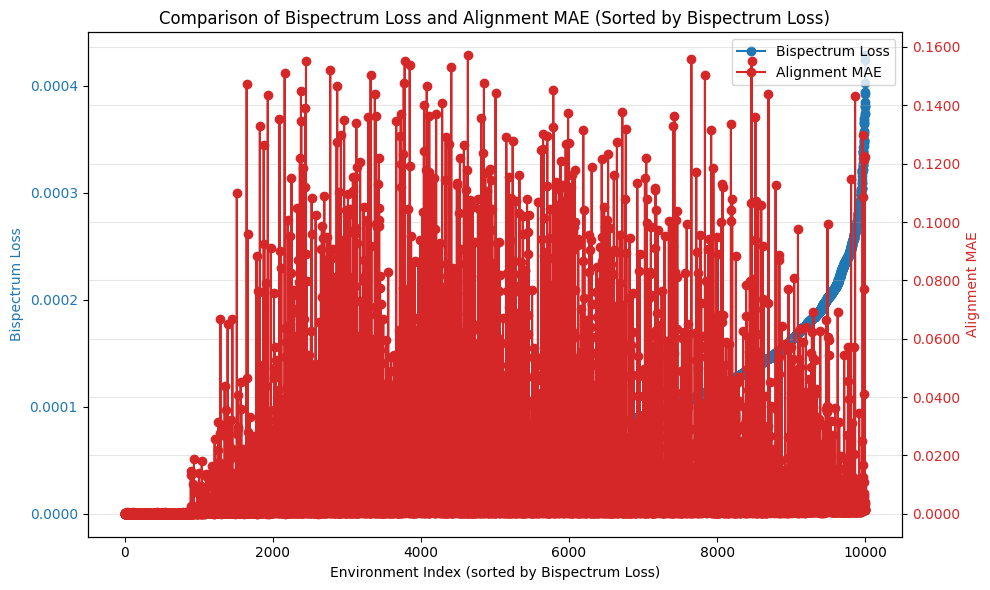

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

# Sort both arrays based on bispectrum losses
sorted_indices = np.argsort(best_final_losses)
sorted_bispectrum_losses = np.array(best_final_losses)[sorted_indices]
sorted_maes = np.array(best_final_maes)[sorted_indices]

# Create figure with primary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot sorted bispectrum losses on primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Environment Index (sorted by Bispectrum Loss)')
ax1.set_ylabel('Bispectrum Loss', color=color)
ax1.plot(sorted_bispectrum_losses, 'o-', color=color, label='Bispectrum Loss')
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_yscale('log')  # Set log scale for primary y-axis
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# Create secondary y-axis for radial MAEs
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Alignment MAE', color=color)
ax2.plot(sorted_maes, 'o-', color=color, label='Alignment MAE')
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_yscale('log')  # Set log scale for secondary y-axis
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title('Comparison of Bispectrum Loss and Alignment MAE (Sorted by Bispectrum Loss)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


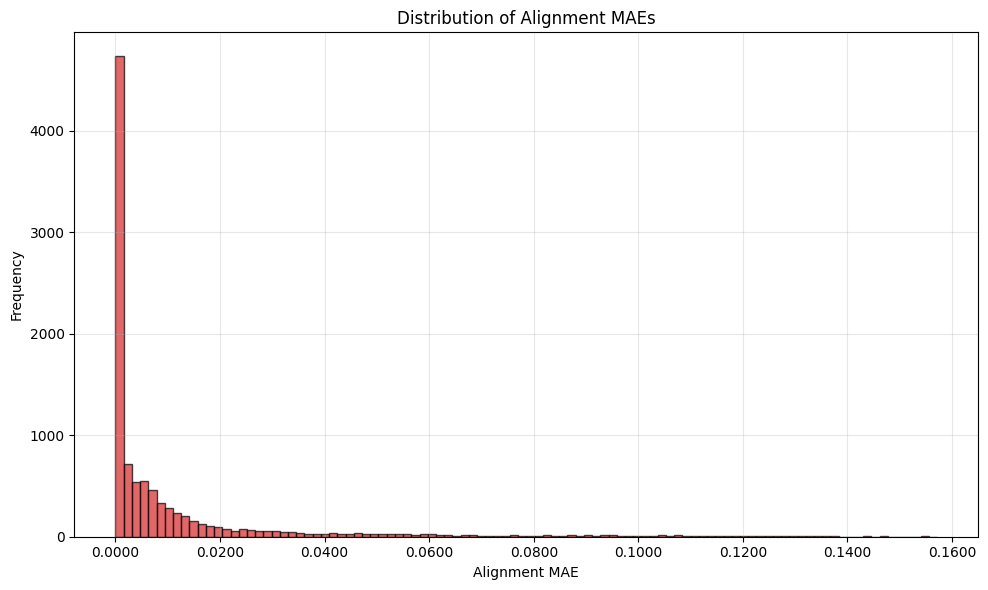

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
plt.figure(figsize=(10, 6))

# Create a histogram of the alignment MAEs
# Filter out infinities before plotting
filtered_maes = best_final_maes[np.isfinite(best_final_maes)]
plt.hist(filtered_maes, bins=100, color='tab:red', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Alignment MAE')
plt.ylabel('Frequency')
plt.title('Distribution of Alignment MAEs')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Format x-axis to show 4 decimal places
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))

# Add tight layout and show the plot
plt.tight_layout()
plt.show()


In [8]:
# Count the number of NaN and Inf values in best_final_maes
nan_count = np.isnan(best_final_maes).sum()
inf_count = np.isinf(best_final_maes).sum()
print(f"Number of NaN values in best_final_maes: {nan_count}")
print(f"Number of Inf values in best_final_maes: {inf_count}")

Number of NaN values in best_final_maes: 0
Number of Inf values in best_final_maes: 2


In [9]:
mismatch_count = 0
for i in range(len(merged_results["best_preds"])):
    if len(merged_results["best_preds"][i]) != len(local_envs[i]):
        mismatch_count += 1
print(f"Number of mismatched predictions: {mismatch_count}")


Number of mismatched predictions: 2


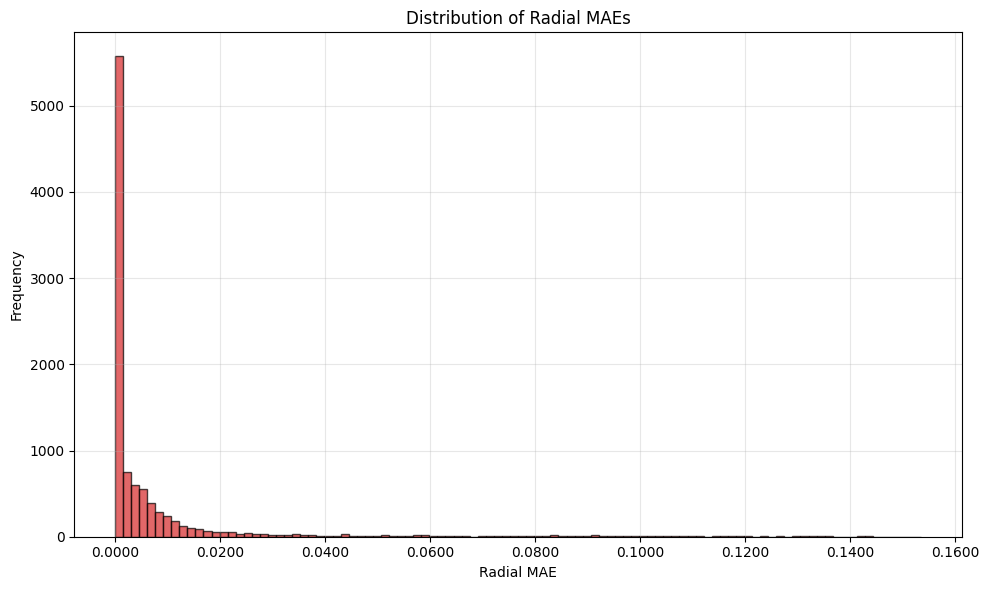

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
plt.figure(figsize=(10, 6))

# Create a histogram of the alignment MAEs
plt.hist(best_radial_maes, bins=100, color='tab:red', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Radial MAE')
plt.ylabel('Frequency')
plt.title('Distribution of Radial MAEs')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Format x-axis to show 4 decimal places
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))

# Add tight layout and show the plot
plt.tight_layout()
plt.show()

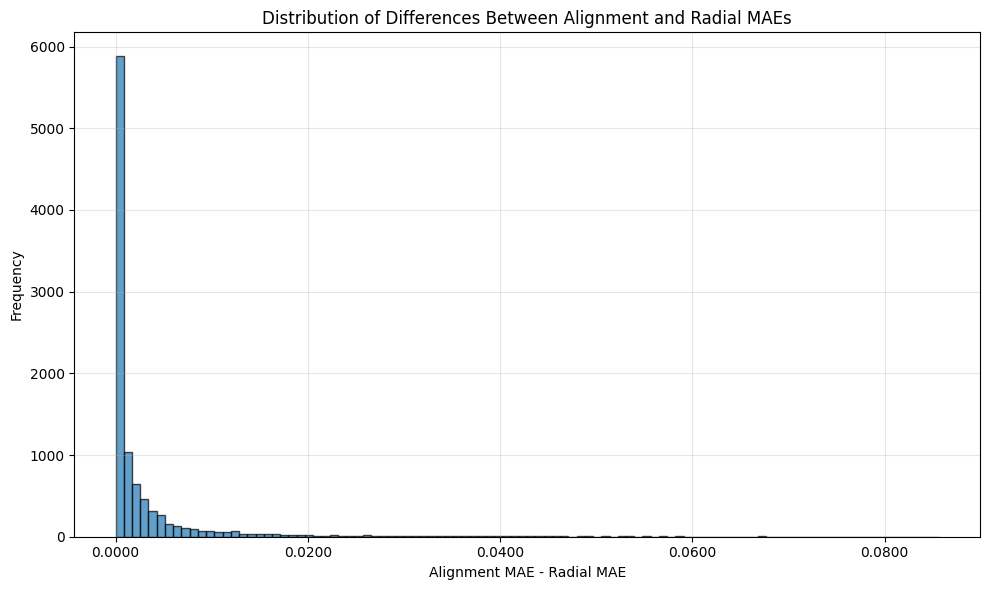

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
plt.figure(figsize=(10, 6))

# Calculate the difference between alignment MAE and radial MAE for each structure
mae_differences = np.array(best_final_maes) - np.array(best_radial_maes)

# Create a histogram of the differences
plt.hist(mae_differences, bins=100, color='tab:blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Alignment MAE - Radial MAE')
plt.ylabel('Frequency')
plt.title('Distribution of Differences Between Alignment and Radial MAEs')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Format x-axis to show 4 decimal places
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))

# Add tight layout and show the plot
plt.tight_layout()
plt.show()


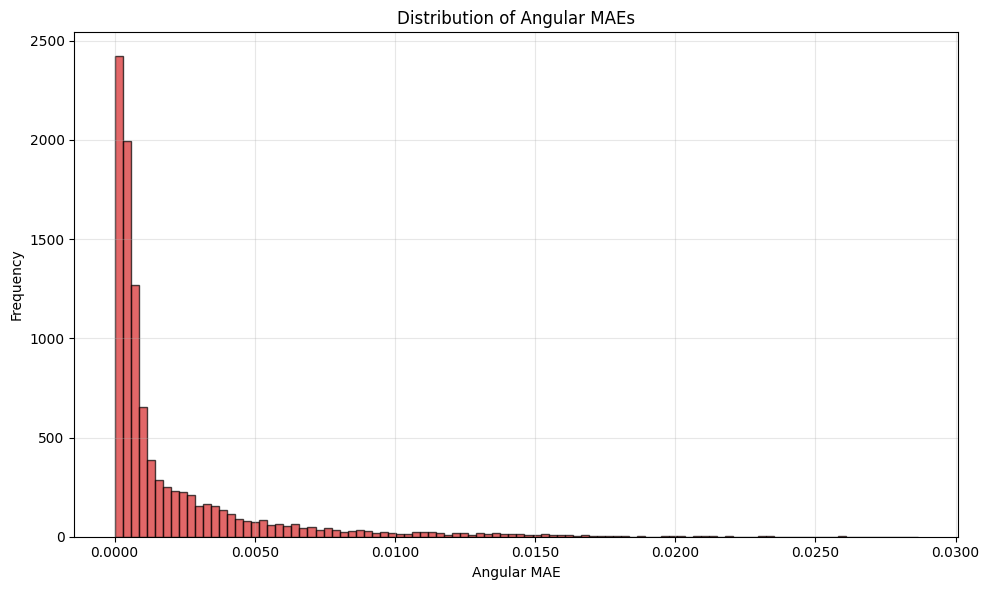

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure
plt.figure(figsize=(10, 6))

# Create a histogram of the angular MAEs
plt.hist(best_angular_maes, bins=100, color='tab:red', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel('Angular MAE')
plt.ylabel('Frequency')
plt.title('Distribution of Angular MAEs')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Format x-axis to show 4 decimal places
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))

# Add tight layout and show the plot
plt.tight_layout()
plt.show()

In [13]:
# Count the number of alignment MAEs that are lower than 0.01
count_below_threshold = sum(mae < 0.01 for mae in best_final_maes)

# Calculate the percentage
percentage_below_threshold = (count_below_threshold / len(best_final_maes)) * 100

# Print the results
print(f"Number of environments with alignment MAE < 0.01: {count_below_threshold}")
print(f"Percentage of environments with alignment MAE < 0.01: {percentage_below_threshold:.2f}%")

# Number of environments with alignment MAE < 0.01: 1188
# Percentage of environments with alignment MAE < 0.01: 58.15%

Number of environments with alignment MAE < 0.01: 7440
Percentage of environments with alignment MAE < 0.01: 74.40%


In [14]:
# Count the number of alignment MAEs that are lower than 0.01
count_below_threshold = sum(mae < 0.01 for mae in best_radial_maes)

# Calculate the percentage
percentage_below_threshold = (count_below_threshold / len(best_radial_maes)) * 100

# Print the results
print(f"Number of environments with radial MAE < 0.01: {count_below_threshold}")
print(f"Percentage of environments with radial MAE < 0.01: {percentage_below_threshold:.2f}%")

Number of environments with radial MAE < 0.01: 8279
Percentage of environments with radial MAE < 0.01: 82.79%


In [15]:
# Specify which highest MAE to analyze (0 = highest, 1 = second highest, etc.)
mae_rank = 1

# Find the indices of sorted MAEs (from highest to lowest)
sorted_mae_indices = np.argsort(best_final_maes)[::-1]
# Get the index of the specified rank
highest_mae_index = sorted_mae_indices[mae_rank]
highest_mae = best_final_maes[highest_mae_index]

# Get the corresponding local environment and predicted environment
highest_mae_local_env = jnp.array(local_envs[highest_mae_index])
# highest_mae_pred_env = jnp.array(merged_results["best_preds"][highest_mae_index])
highest_mae_pred_env = aligned_predicted_geometries[highest_mae_index]

# Print information about the highest MAE case
print(f"Rank {mae_rank} highest alignment MAE: {highest_mae:.6f}")
print(f"Index of this MAE: {highest_mae_index}")
print(f"Shape of local environment: {highest_mae_local_env.shape if hasattr(highest_mae_local_env, 'shape') else 'N/A'}")
print(f"Shape of predicted environment: {highest_mae_pred_env.shape if hasattr(highest_mae_pred_env, 'shape') else 'N/A'}")


Rank 1 highest alignment MAE: inf
Index of this MAE: 4702
Shape of local environment: (4, 3)
Shape of predicted environment: N/A


In [51]:
highest_mae_local_env = np.array(local_envs[2154])

In [52]:
visualize_signal(sum_of_diracs(highest_mae_local_env, 5))

In [55]:
# Calculate pairwise vectors between all points
points = highest_mae_local_env
n_points = len(points)
min_angle = float('inf')

# Compute all pairwise angles
for i in range(n_points):
    for j in range(i+1, n_points):
        for k in range(j+1, n_points):
            # Get vectors from point i to j and i to k
            v1 = points[j] - points[i]
            v2 = points[k] - points[i]
            
            # Normalize vectors
            v1 = v1 / np.linalg.norm(v1)
            v2 = v2 / np.linalg.norm(v2)
            
            # Compute angle (in degrees)
            cos_angle = np.clip(np.dot(v1, v2), -1.0, 1.0)
            angle = np.arccos(cos_angle) * 180 / np.pi
            
            # Update minimum angle
            min_angle = min(min_angle, angle)

print(f"Minimum pairwise angle in the geometry: {min_angle:.2f} degrees")
highest_mae_local_env

Minimum pairwise angle in the geometry: 49.04 degrees


array([[-0.7853,  0.6978,  1.04  ],
       [ 0.4758,  0.0687,  1.3399],
       [-0.3158, -0.9852, -0.3376],
       [ 0.5504,  0.5953, -0.7282]])

In [53]:
highest_mae_local_env

array([[-0.7853,  0.6978,  1.04  ],
       [ 0.4758,  0.0687,  1.3399],
       [-0.3158, -0.9852, -0.3376],
       [ 0.5504,  0.5953, -0.7282]])

In [56]:
from utils.plotters import visualize_signal, visualize_geometry

visualize_geometry(merged_results["best_preds"][highest_mae_index], lmax=5, show_points=True)

In [57]:
worst_pred = np.array(merged_results["best_preds"][highest_mae_index])


stacked_worst_pred = stack_points(worst_pred)
print(stacked_worst_pred.shape)

(4, 3)


In [37]:
merged_results.keys()

dict_keys(['best_preds', 'all_final_preds', 'processing_time'])

In [262]:
# Calculate and print sorted norms of each row in the local environment
local_norms = jnp.linalg.norm(highest_mae_local_env, axis=1)
print("Local environment norms (sorted):")
print(jnp.sort(local_norms))
print("Sum of local environment norms:")
print(jnp.sum(local_norms))

# Calculate and print sorted norms of each row in the predicted environment
pred_norms = jnp.linalg.norm(highest_mae_pred_env, axis=1)
print("\nPredicted environment norms (sorted):")
print(jnp.sort(pred_norms))
print("Sum of predicted environment norms:")
print(jnp.sum(pred_norms))

Local environment norms (sorted):
[1.09335248 1.0996671  1.51193102 1.53636948]
Sum of local environment norms:
5.2413200868260565

Predicted environment norms (sorted):
[1.01123521 1.26754325 1.35213924 1.61117353]
Sum of predicted environment norms:
5.242091233947448


In [263]:
radius_mae_fast(highest_mae_local_env, highest_mae_pred_env)

0.12114731129756084

In [264]:
# Calculate and print sorted norms of each row in the local environment
local_norms = jnp.linalg.norm(highest_mae_local_env, axis=1)
print("Local environment norms:")
print(local_norms)
pred_norms = jnp.linalg.norm(highest_mae_pred_env, axis=1)
print("\nPredicted environment norms:")
print(pred_norms)

jnp.mean(jnp.abs(jnp.sort(local_norms) - jnp.sort(pred_norms)))

Local environment norms:
[1.53636948 1.51193102 1.0996671  1.09335248]

Predicted environment norms:
[1.61117353 1.35213924 1.01123521 1.26754325]


Array(0.12114731, dtype=float64)

In [237]:
angular_mae_fast(highest_mae_local_env, highest_mae_pred_env)

0.007563453411981946

In [238]:
sum_dist, max_dist = point_distance(highest_mae_local_env, highest_mae_pred_env)
print(sum_dist / highest_mae_local_env.shape[0])

0.14040982111996997


Pairwise Correlations:
Radial MAE vs Angular MAE: r=0.6137, p=0.0000e+00
Radial MAE vs Final MAE: r=0.9476, p=0.0000e+00
Angular MAE vs Final MAE: r=0.6954, p=0.0000e+00


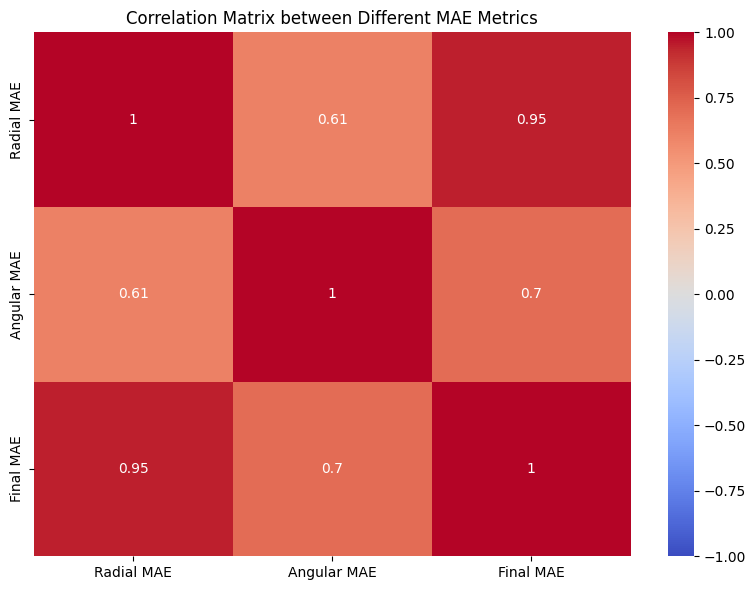

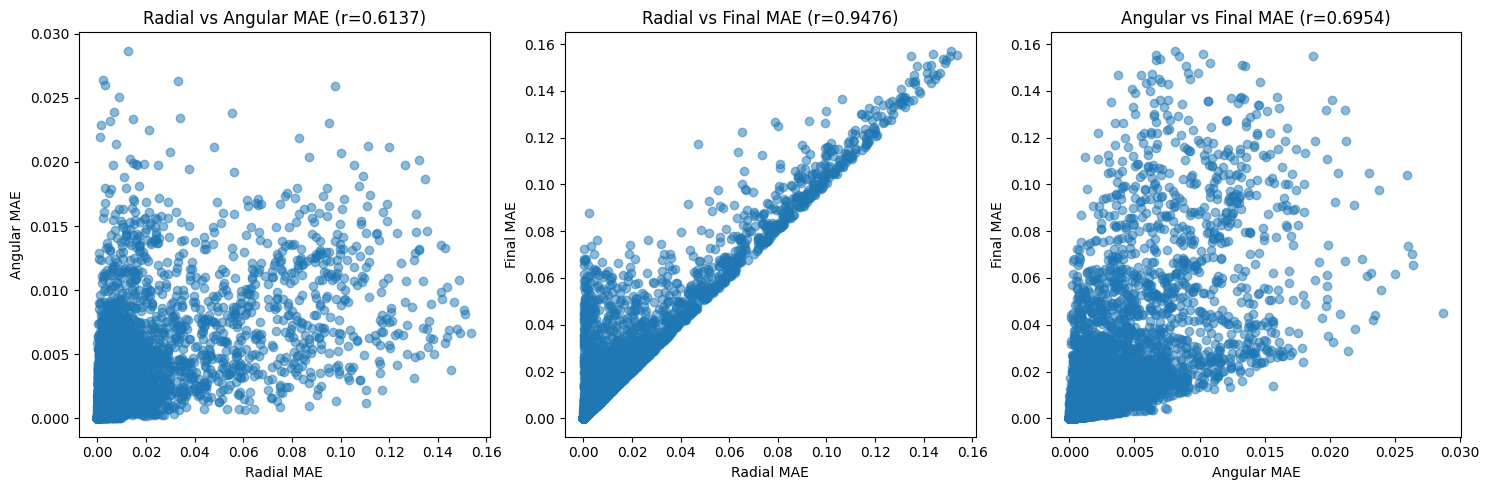

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

# Compute pairwise correlations
# Create masks for valid values (not NaN or inf)
radial_mask = ~(np.isnan(best_radial_maes) | np.isinf(best_radial_maes))
angular_mask = ~(np.isnan(best_angular_maes) | np.isinf(best_angular_maes))
final_mask = ~(np.isnan(best_final_maes) | np.isinf(best_final_maes))

# Apply masks for each correlation calculation
radial_angular_mask = radial_mask & angular_mask
radial_final_mask = radial_mask & final_mask
angular_final_mask = angular_mask & final_mask

# Calculate correlations with masked arrays
corr_radial_angular = pearsonr(best_radial_maes[radial_angular_mask], best_angular_maes[radial_angular_mask])
corr_radial_final = pearsonr(best_radial_maes[radial_final_mask], best_final_maes[radial_final_mask])
corr_angular_final = pearsonr(best_angular_maes[angular_final_mask], best_final_maes[angular_final_mask])

# Print correlation results
print("Pairwise Correlations:")
print(f"Radial MAE vs Angular MAE: r={corr_radial_angular[0]:.4f}, p={corr_radial_angular[1]:.4e}")
print(f"Radial MAE vs Final MAE: r={corr_radial_final[0]:.4f}, p={corr_radial_final[1]:.4e}")
print(f"Angular MAE vs Final MAE: r={corr_angular_final[0]:.4f}, p={corr_angular_final[1]:.4e}")

# Create a correlation matrix for visualization
corr_matrix = np.array([
    [1.0, corr_radial_angular[0], corr_radial_final[0]],
    [corr_radial_angular[0], 1.0, corr_angular_final[0]],
    [corr_radial_final[0], corr_angular_final[0], 1.0]
])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            xticklabels=['Radial MAE', 'Angular MAE', 'Final MAE'],
            yticklabels=['Radial MAE', 'Angular MAE', 'Final MAE'])
plt.title('Correlation Matrix between Different MAE Metrics')
plt.tight_layout()
plt.show()

# Create scatter plots to visualize relationships
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Radial vs Angular
axes[0].scatter(best_radial_maes, best_angular_maes, alpha=0.5)
axes[0].set_xlabel('Radial MAE')
axes[0].set_ylabel('Angular MAE')
axes[0].set_title(f'Radial vs Angular MAE (r={corr_radial_angular[0]:.4f})')

# Radial vs Final
axes[1].scatter(best_radial_maes, best_final_maes, alpha=0.5)
axes[1].set_xlabel('Radial MAE')
axes[1].set_ylabel('Final MAE')
axes[1].set_title(f'Radial vs Final MAE (r={corr_radial_final[0]:.4f})')

# Angular vs Final
axes[2].scatter(best_angular_maes, best_final_maes, alpha=0.5)
axes[2].set_xlabel('Angular MAE')
axes[2].set_ylabel('Final MAE')
axes[2].set_title(f'Angular vs Final MAE (r={corr_angular_final[0]:.4f})')

plt.tight_layout()
plt.show()




Linear Regression Results:
Coefficients: Radial MAE = 0.9445, Angular MAE = 1.3018
Intercept: 0.0009
R² Score: 0.9188
RMSE: 0.0064
Equation: Final MAE = 0.0009 + 0.9445 × Radial MAE + 1.3018 × Angular MAE


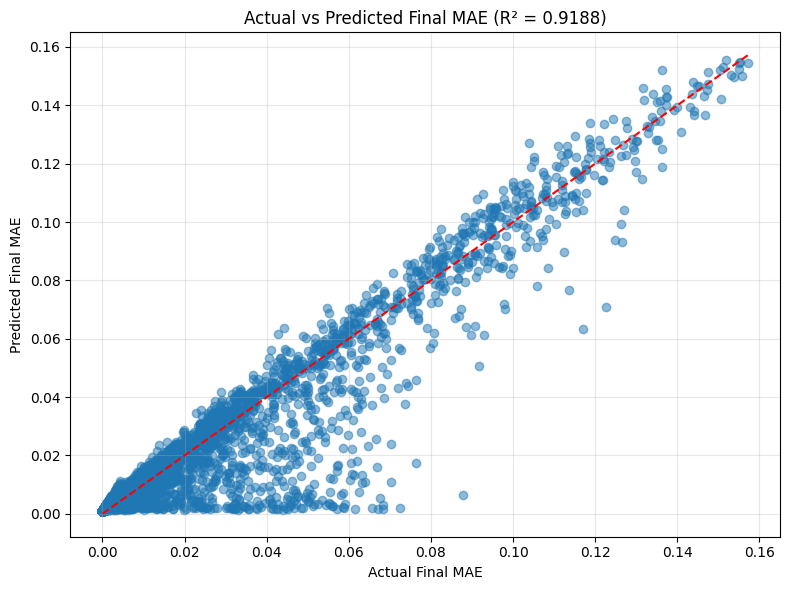

In [17]:
# Perform linear regression to predict final MAE from radial and angular MAEs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for regression
# Create a mask for valid values (not NaN or inf)
valid_mask = ~(np.isnan(best_radial_maes) | np.isnan(best_angular_maes) | 
               np.isnan(best_final_maes) | np.isinf(best_radial_maes) | 
               np.isinf(best_angular_maes) | np.isinf(best_final_maes))

# Apply the mask to filter out NaN and inf values
X = np.column_stack((best_radial_maes[valid_mask], best_angular_maes[valid_mask]))
y = best_final_maes[valid_mask]

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate metrics
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print results
print("\nLinear Regression Results:")
print(f"Coefficients: Radial MAE = {model.coef_[0]:.4f}, Angular MAE = {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"Equation: Final MAE = {model.intercept_:.4f} + {model.coef_[0]:.4f} × Radial MAE + {model.coef_[1]:.4f} × Angular MAE")

# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--')
plt.xlabel('Actual Final MAE')
plt.ylabel('Predicted Final MAE')
plt.title(f'Actual vs Predicted Final MAE (R² = {r2:.4f})')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [62]:
merged_results.keys()

dict_keys(['best_preds', 'all_final_preds', 'processing_time'])

In [18]:
# Create an array to store the best alignment MAE for each structure and initialization
import numpy as np
from tqdm import tqdm

# Get the number of environments and initializations
num_envs = len(merged_results['all_final_preds'])
num_inits = len(merged_results['all_final_preds'][0])

# Initialize the array to store the alignment MAE values corresponding to best bispectrum MAE
best_alignment_mae_per_init = np.zeros((num_envs, num_inits))
# Track the best bispectrum MAE seen so far for each environment
best_bispectrum_mae_per_env = np.ones(num_envs) * float('inf')

# For each environment and each initialization, track the cumulative minimum bispectrum MAE
# and store the corresponding alignment MAE
for i in tqdm(range(num_envs), desc="Processing environments"):
    # Get the target environment
    target_env = local_envs[i]
    true_bs = compute_bispectrum(jnp.array(target_env))

    # For each initialization
    for j in range(num_inits):
        pred_env = merged_results['all_final_preds'][i][j]
        
        # Calculate MAE in the difference between the bispectrum of true and predicted env
        pred_bs = compute_bispectrum(jnp.array(pred_env))
        bispectrum_mae = jnp.mean(jnp.abs(true_bs - pred_bs))
        
        # If this prediction has a better bispectrum MAE, update the best so far
        if bispectrum_mae < best_bispectrum_mae_per_env[i]:
            best_bispectrum_mae_per_env[i] = bispectrum_mae
            mae, _ = alignment_mae(target_env, pred_env)
            best_alignment_mae_per_init[i, j] = mae
        else:
            # Otherwise, keep the previous best alignment MAE
            if j > 0:  # Check to avoid index error for j=0
                best_alignment_mae_per_init[i, j] = best_alignment_mae_per_init[i, j-1]
            # For j=0, if it's not the best, it will remain zero as initialized

Processing environments:   0%|          | 0/10000 [00:00<?, ?it/s]/var/folders/7c/7cx32s8x1x32j9xw0z_x3y980000gn/T/ipykernel_86967/1447878803.py:65: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, rmsd = Rotation.align_vectors(true_weighted, pred_weighted)
Processing environments: 100%|██████████| 10000/10000 [01:24<00:00, 118.20it/s]


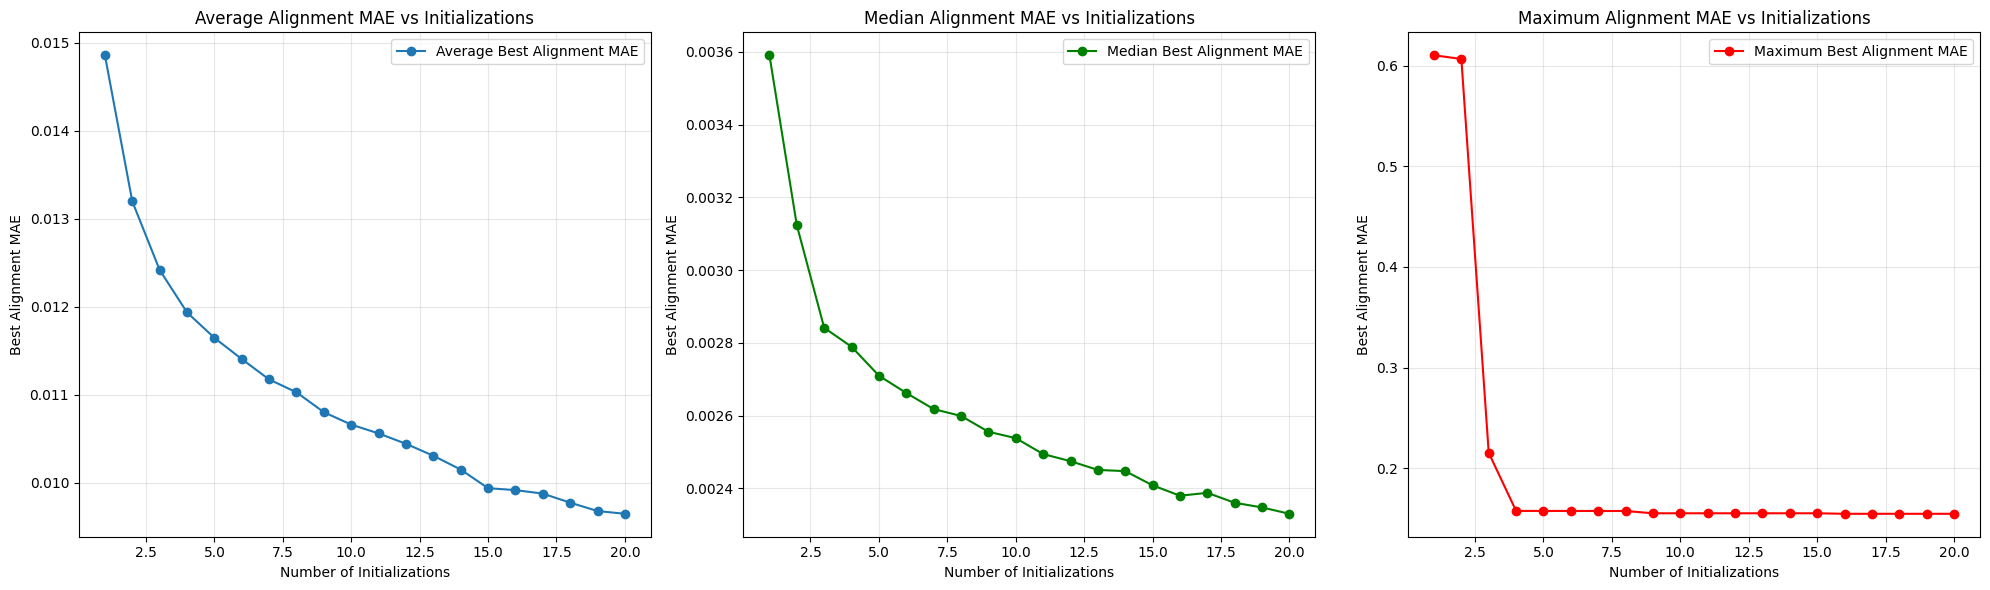

In [26]:
# Visualize the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Create a mask for non-Inf values and replace Inf with NaN for calculations
mask = ~np.isinf(best_alignment_mae_per_init)
masked_values = np.where(mask, best_alignment_mae_per_init, np.nan)

# Plot average MAE
avg_best_alignment_mae = np.nanmean(masked_values, axis=0)
ax1.plot(range(1, num_inits + 1), avg_best_alignment_mae, 'o-', label='Average Best Alignment MAE')
ax1.set_xlabel('Number of Initializations')
ax1.set_ylabel('Best Alignment MAE')
ax1.set_title('Average Alignment MAE vs Initializations')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Calculate median MAE using same approach as mean
median_best_alignment_mae = np.nanmedian(masked_values, axis=0)
ax2.plot(range(1, num_inits + 1), median_best_alignment_mae, 'o-', color='green', label='Median Best Alignment MAE')
ax2.set_xlabel('Number of Initializations')
ax2.set_ylabel('Best Alignment MAE')
ax2.set_title('Median Alignment MAE vs Initializations')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Calculate max MAE using same approach as mean and median
max_best_alignment_mae = np.nanmax(masked_values, axis=0)
ax3.plot(range(1, num_inits + 1), max_best_alignment_mae, 'o-', color='red', label='Maximum Best Alignment MAE')
ax3.set_xlabel('Number of Initializations')
ax3.set_ylabel('Best Alignment MAE')
ax3.set_title('Maximum Alignment MAE vs Initializations')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
plt.show()

In [34]:
best_alignment_mae_per_init

array([[0.00106864, 0.00106864, 0.00106864, ..., 0.00164954, 0.00164954,
        0.00164954],
       [0.00610727, 0.00610727, 0.00610727, ..., 0.00517203, 0.00517203,
        0.00517203],
       [0.00074825, 0.00074825, 0.00074825, ..., 0.00437724, 0.00437724,
        0.00437724],
       ...,
       [0.02684942, 0.00984217, 0.00984217, ..., 0.02641615, 0.02641615,
        0.02641615],
       [0.00640003, 0.00640003, 0.00640003, ..., 0.00297329, 0.00297329,
        0.00297329],
       [0.01934045, 0.01934045, 0.01269441, ..., 0.01568181, 0.01568181,
        0.01568181]], shape=(10000, 20))

Array shape: (10000, 20)
Contains NaN: False
Contains Inf: True
Min value: 1.1788756371235172e-06
Max value: 0.610171217193499

Computed statistics:
Mean errors: [0.01485684 0.01319645 0.01241644 0.01193408 0.01164454 0.01140357
 0.01117181 0.01102542 0.01079946 0.01065843 0.01055814 0.01044022
 0.01030422 0.01014754 0.00993569 0.00991384 0.009874   0.00977118
 0.00967597 0.00964457]
Valid counts per column: [9944 9987 9996 9994 9996 9997 9997 9997 9998 9998 9997 9996 9996 9996
 9996 9996 9996 9996 9996 9995]


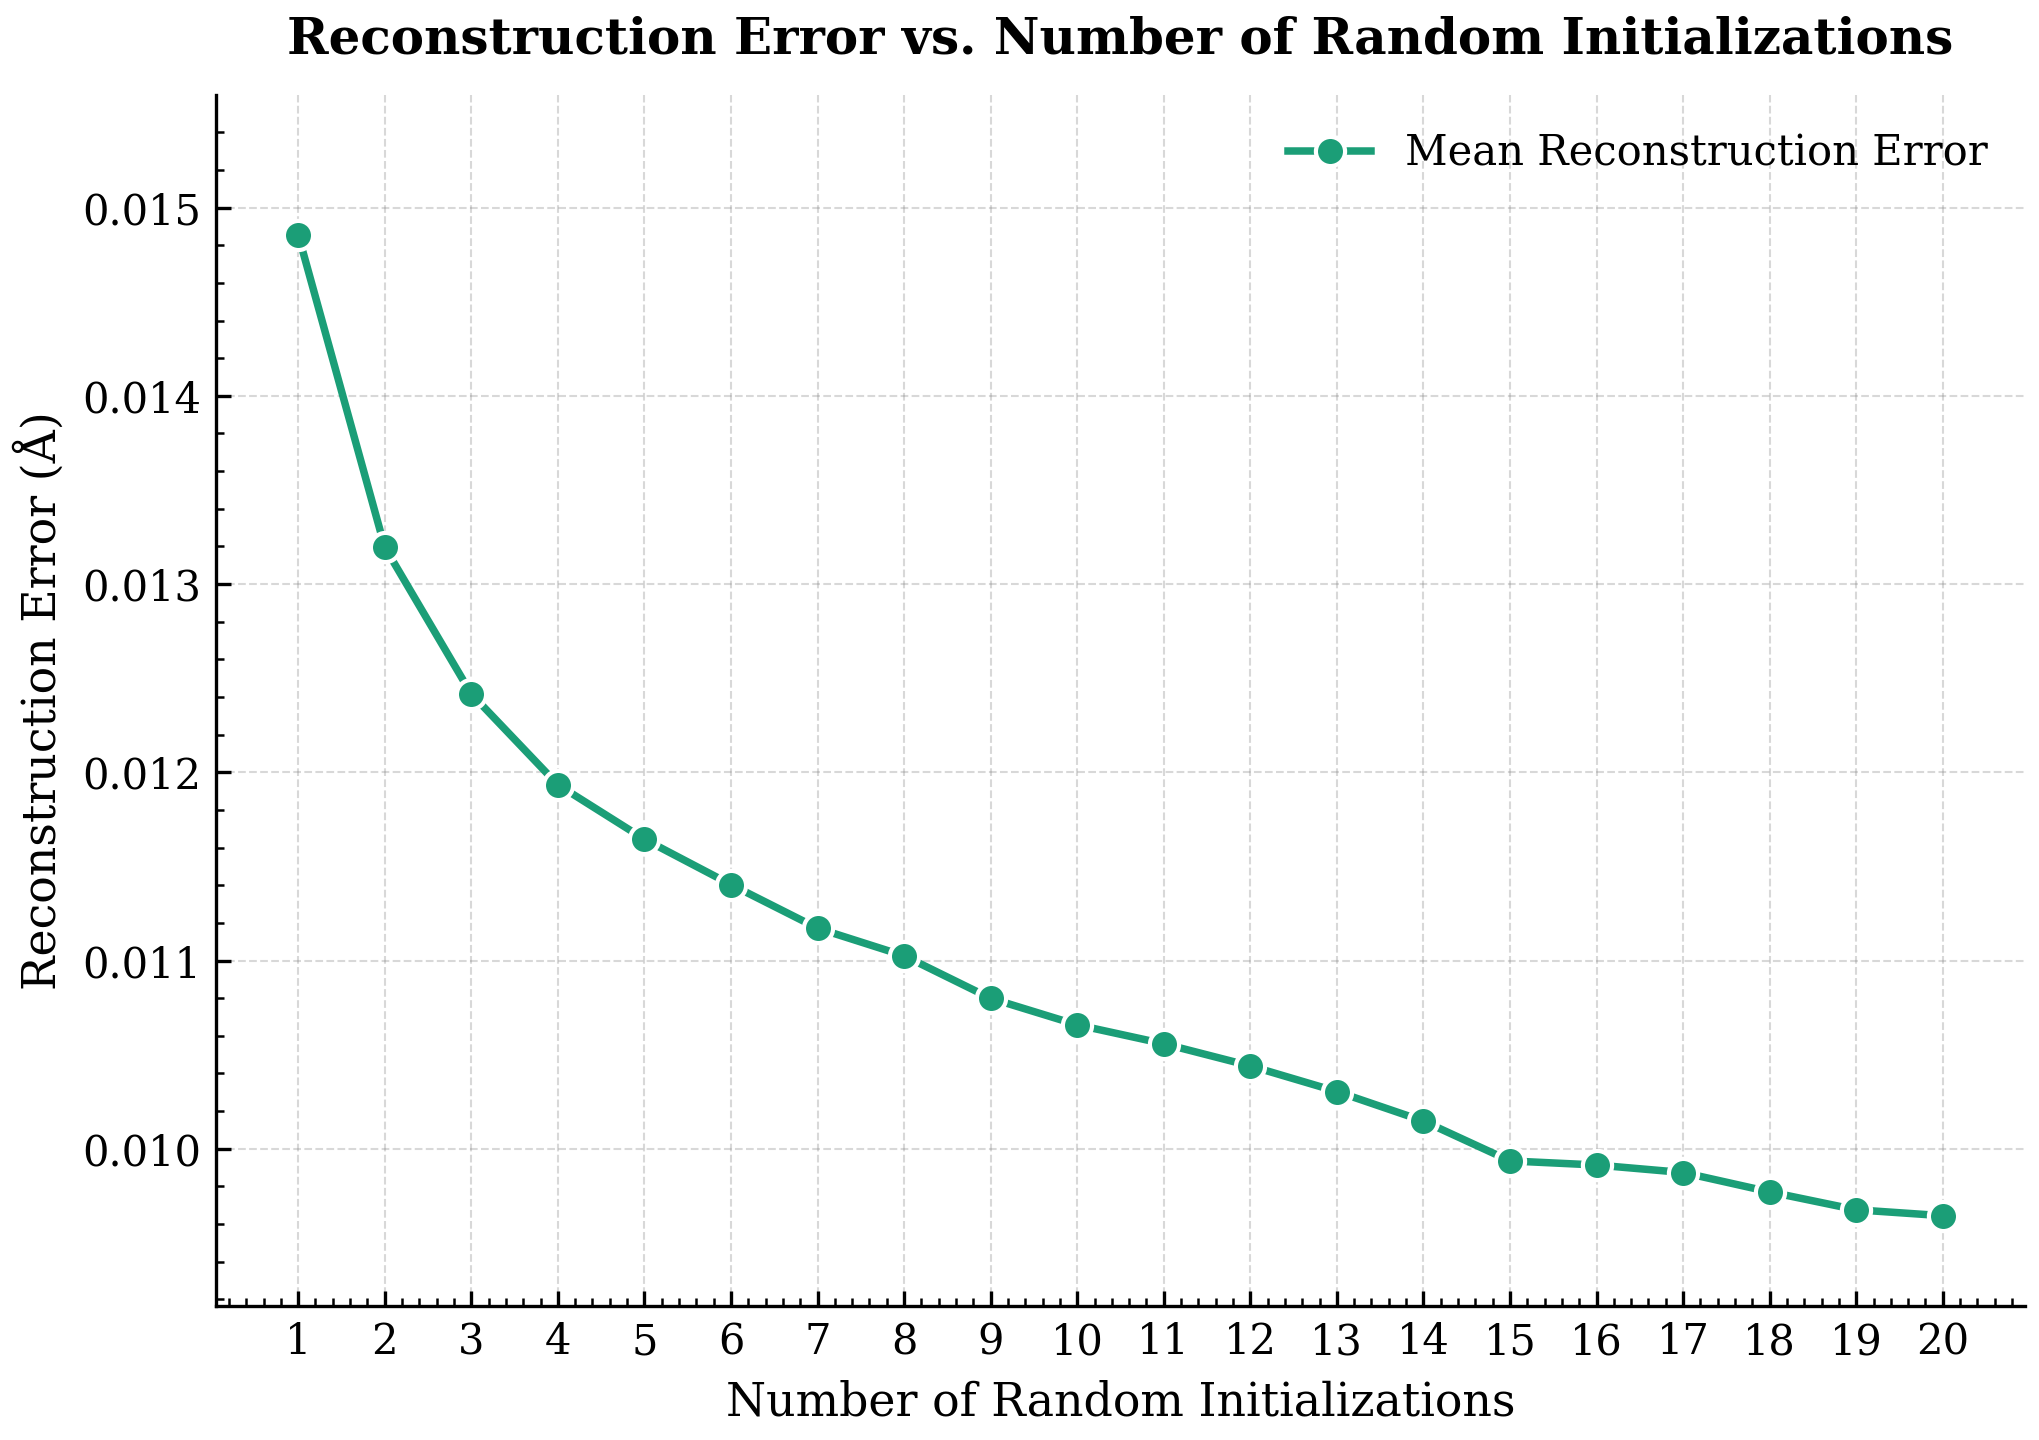

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import warnings

# Temporarily suppress specific runtime warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Set publication-quality plot style
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'DejaVu Serif', 'Times New Roman'],
    'mathtext.fontset': 'cm',
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.6,
    'lines.linewidth': 1.5,
    'lines.markersize': 5,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'xtick.minor.size': 2.0,
    'ytick.minor.size': 2.0,
    'axes.axisbelow': True,
    'axes.grid': False,
})

# Process the data from the array
num_points = np.arange(1, 21)  # 1 to 20

# Print diagnostic info about the input array
print(f"Array shape: {best_alignment_mae_per_init.shape}")
print(f"Contains NaN: {np.isnan(best_alignment_mae_per_init).any()}")
print(f"Contains Inf: {np.isinf(best_alignment_mae_per_init).any()}")
print(f"Min value: {np.nanmin(best_alignment_mae_per_init[np.isfinite(best_alignment_mae_per_init)])}")
print(f"Max value: {np.nanmax(best_alignment_mae_per_init[np.isfinite(best_alignment_mae_per_init)])}")

# Safely compute statistics for each column
mean_errors = np.zeros(20)
valid_counts = np.zeros(20, dtype=int)

for i in range(20):
    # Get valid values (neither NaN nor Inf) for this column
    valid_values = best_alignment_mae_per_init[:, i]
    valid_values = valid_values[np.isfinite(valid_values)]  # Remove both NaN and Inf
    
    valid_counts[i] = len(valid_values)
    
    if len(valid_values) > 0:
        mean_errors[i] = np.mean(valid_values)
    else:
        mean_errors[i] = np.nan

# Print diagnostic info about the computed statistics
print("\nComputed statistics:")
print(f"Mean errors: {mean_errors}")
print(f"Valid counts per column: {valid_counts}")

# Check if we have any valid data points to plot
if np.isfinite(mean_errors).any():
    # Use a colorblind-friendly color
    color = '#1b9e77'  # Green from ColorBrewer2.org palette

    # Create the figure with one plot
    fig, ax = plt.figure(figsize=(7, 5)), plt.gca()

    # Plot only the finite values
    mask = np.isfinite(mean_errors)
    ax.plot(num_points[mask], mean_errors[mask], marker='o', linestyle='-', 
            linewidth=1.8, markersize=7, markeredgewidth=1.0,
            color=color, markerfacecolor=color, markeredgecolor='white',
            label='Mean Reconstruction Error')

    # Enhance axis formatting
    ax.grid(True, linestyle='--', alpha=0.3, color='gray', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

    # Format axes - ensure x-axis uses integer ticks
    ax.set_xlabel('Number of Random Initializations', fontweight='normal')
    ax.set_ylabel('Reconstruction Error (Å)', fontweight='normal')
    ax.set_title('Reconstruction Error vs. Number of Random Initializations', fontweight='bold', pad=10)
    ax.set_xticks(num_points)
    
    # Set y-axis limits based on data range instead of starting at 0
    valid_means = mean_errors[mask]
    y_min = max(0, np.min(valid_means) * 0.95)  # 5% below minimum value, but not below 0
    y_max = np.max(valid_means) * 1.05  # 5% above maximum value
    ax.set_ylim(y_min, y_max)

    # Add legend
    ax.legend(loc='upper right', frameon=False)

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig('alignment_error_plot.pdf', dpi=600, bbox_inches='tight')
    plt.savefig('alignment_error_plot.png', dpi=600, bbox_inches='tight')

    plt.show()
else:
    print("ERROR: No valid data points to plot. All mean values are NaN or Inf.")

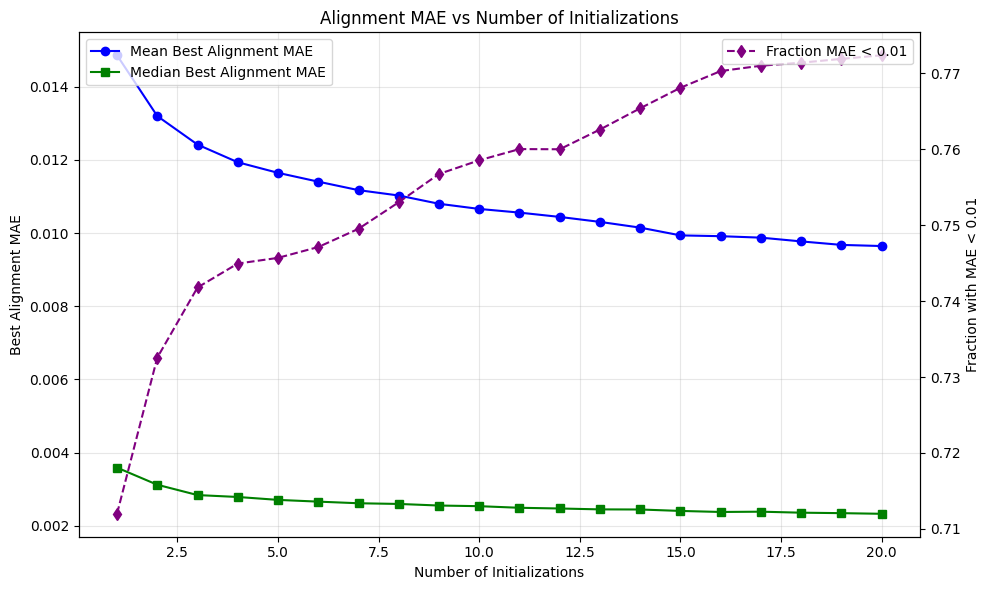

In [25]:
# Visualize the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create a mask for non-Inf values and replace Inf with NaN for calculations
mask = ~np.isinf(best_alignment_mae_per_init)
masked_values = np.where(mask, best_alignment_mae_per_init, np.nan)

# Plot mean and median MAE
avg_best_alignment_mae = np.nanmean(masked_values, axis=0)
median_best_alignment_mae = np.nanmedian(masked_values, axis=0)

ax1.plot(range(1, num_inits + 1), avg_best_alignment_mae, 'o-', color='blue', label='Mean Best Alignment MAE')
ax1.plot(range(1, num_inits + 1), median_best_alignment_mae, 's-', color='green', label='Median Best Alignment MAE')
ax1.set_xlabel('Number of Initializations')
ax1.set_ylabel('Best Alignment MAE')
ax1.set_title('Alignment MAE vs Number of Initializations')
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left')

# Add second y-axis for fraction of points with MAE < 0.01
ax2 = ax1.twinx()
fraction_below_threshold = np.array([np.sum(masked_values[:, i] < 0.01) / np.sum(~np.isnan(masked_values[:, i])) for i in range(num_inits)])
ax2.plot(range(1, num_inits + 1), fraction_below_threshold, 'd--', color='purple', label='Fraction MAE < 0.01')
ax2.set_ylabel('Fraction with MAE < 0.01')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

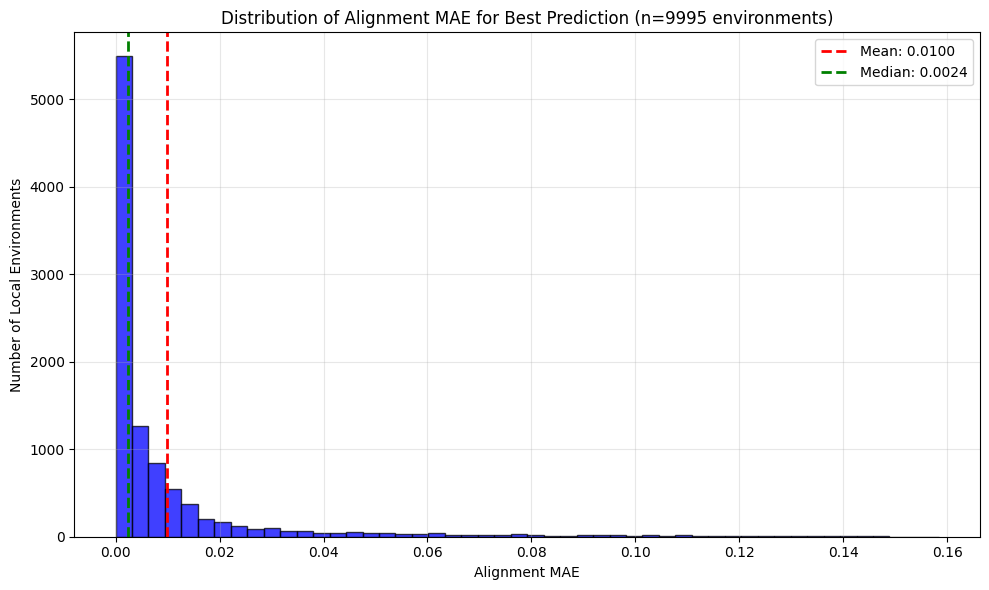

In [8]:
# Plot histogram of alignment MAE for the last (best) prediction
plt.figure(figsize=(10, 6))

# Get the MAE values for the last initialization (best prediction)
# Filter out inf values for better visualization
last_init_mae = best_alignment_mae_per_init[:, -1]
valid_mae = last_init_mae[~np.isinf(last_init_mae)]

# Create histogram
plt.hist(valid_mae, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel('Alignment MAE')
plt.ylabel('Number of Local Environments')
plt.title(f'Distribution of Alignment MAE for Best Prediction (n={len(valid_mae)} environments)')
plt.grid(True, alpha=0.3)

# Add statistics to the plot
plt.axvline(np.mean(valid_mae), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(valid_mae):.4f}')
plt.axvline(np.median(valid_mae), color='green', linestyle='dashed', linewidth=2, label=f'Median: {np.median(valid_mae):.4f}')

# Add legend
plt.legend()

plt.tight_layout()
plt.show()


In [61]:
# Count the number of False values in each column of mask
false_counts = np.sum(~mask, axis=0)
print("Number of False values in each column (initialization):")
for i, count in enumerate(false_counts):
    print(f"Initialization {i+1}: {count} False values")

Number of False values in each column (initialization):
Initialization 1: 56 False values
Initialization 2: 12 False values
Initialization 3: 4 False values
Initialization 4: 6 False values
Initialization 5: 4 False values
Initialization 6: 4 False values
Initialization 7: 4 False values
Initialization 8: 4 False values
Initialization 9: 3 False values
Initialization 10: 3 False values
Initialization 11: 4 False values
Initialization 12: 5 False values
Initialization 13: 5 False values
Initialization 14: 5 False values
Initialization 15: 5 False values
Initialization 16: 5 False values
Initialization 17: 5 False values
Initialization 18: 5 False values
Initialization 19: 5 False values
Initialization 20: 5 False values


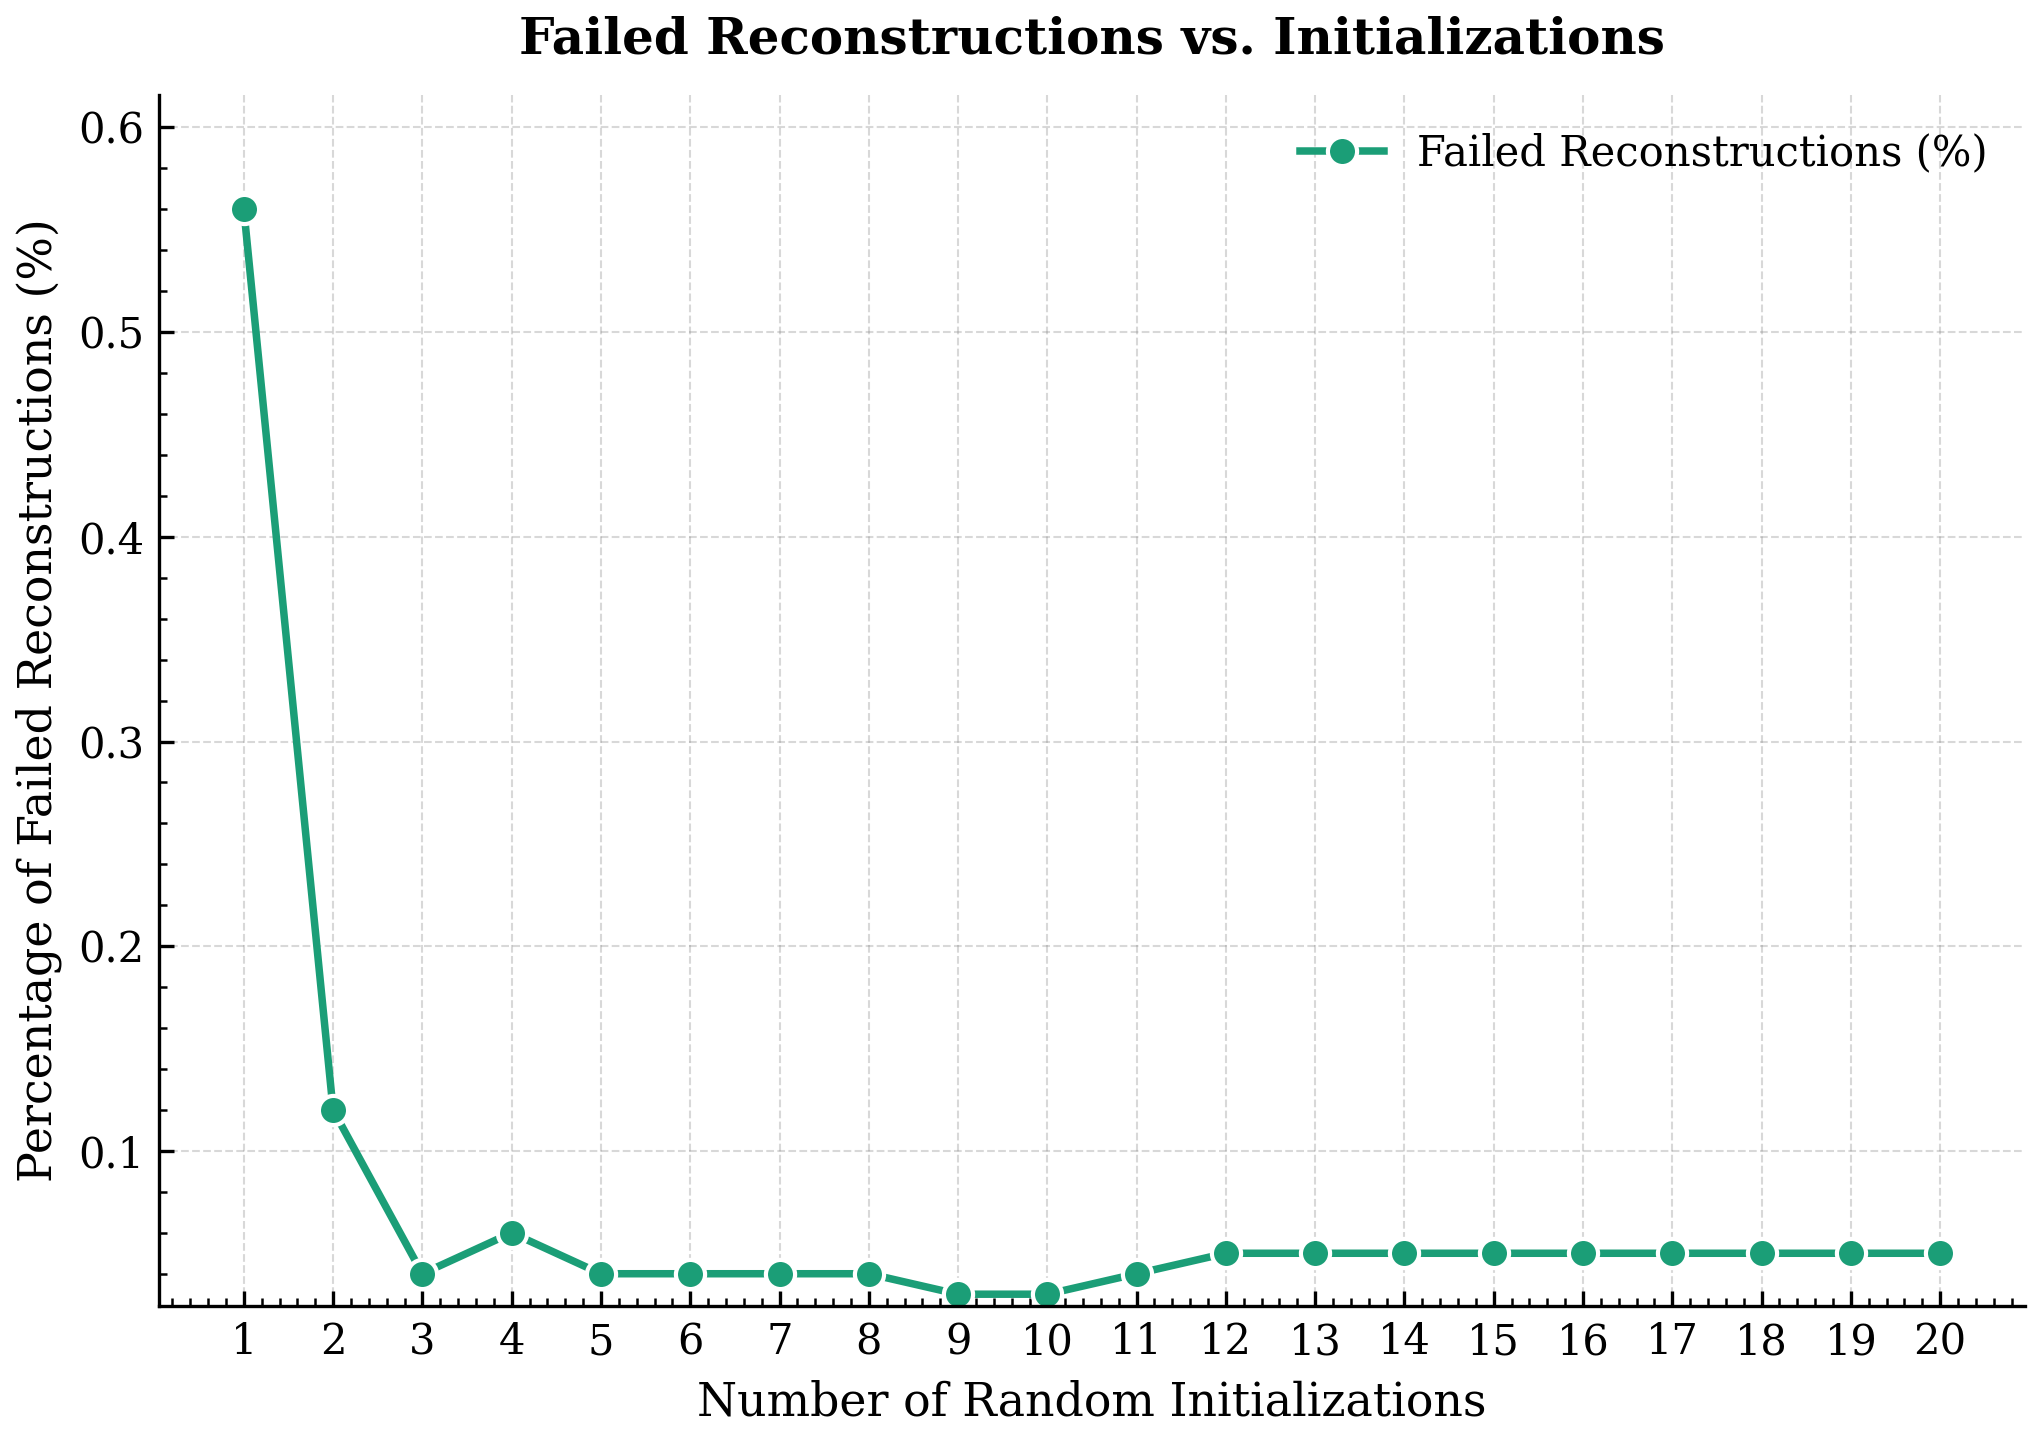

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Set publication-quality plot style
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'DejaVu Serif', 'Times New Roman'],
    'mathtext.fontset': 'cm',
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.6,
    'lines.linewidth': 1.5,
    'lines.markersize': 5,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'xtick.minor.size': 2.0,
    'ytick.minor.size': 2.0,
    'axes.axisbelow': True,
    'axes.grid': False,
})

# Define the data
num_points = np.arange(1, 21)  # 1 to 20
false_values = [56, 12, 4, 6, 4, 4, 4, 4, 3, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5]
# Convert to percentages
percentage_values = [val / 10000 * 100 for val in false_values]

# Create the figure
fig, ax = plt.figure(figsize=(7, 5)), plt.gca()

# Use a colorblind-friendly color
color = '#1b9e77'  # Green from ColorBrewer2.org palette

# Plot the data as a line plot with markers
ax.plot(num_points, percentage_values, marker='o', linestyle='-', 
        linewidth=1.8, markersize=7, markeredgewidth=1.0,
        color=color, markerfacecolor=color, markeredgecolor='white',
        label='Failed Reconstructions (%)')

# Enhance axis formatting
ax.grid(True, linestyle='--', alpha=0.3, color='gray', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# Format axes
ax.set_xlabel('Number of Random Initializations', fontweight='normal')
ax.set_ylabel('Percentage of Failed Reconstructions (%)', fontweight='normal')
ax.set_title('Failed Reconstructions vs. Initializations', fontweight='bold', pad=10)
ax.set_xticks(num_points)

# Set y-axis limits based on data range
y_min = max(0, min(percentage_values) * 0.8)  # Give some padding at the bottom
y_max = max(percentage_values) * 1.1  # Give some padding at the top
ax.set_ylim(y_min, y_max)

# Add legend
ax.legend(loc='upper right', frameon=False)

# Adjust layout and save
plt.tight_layout()
plt.savefig('failed_alignments_plot.pdf', dpi=600, bbox_inches='tight')
plt.savefig('failed_alignments_plot.png', dpi=600, bbox_inches='tight')

plt.show()

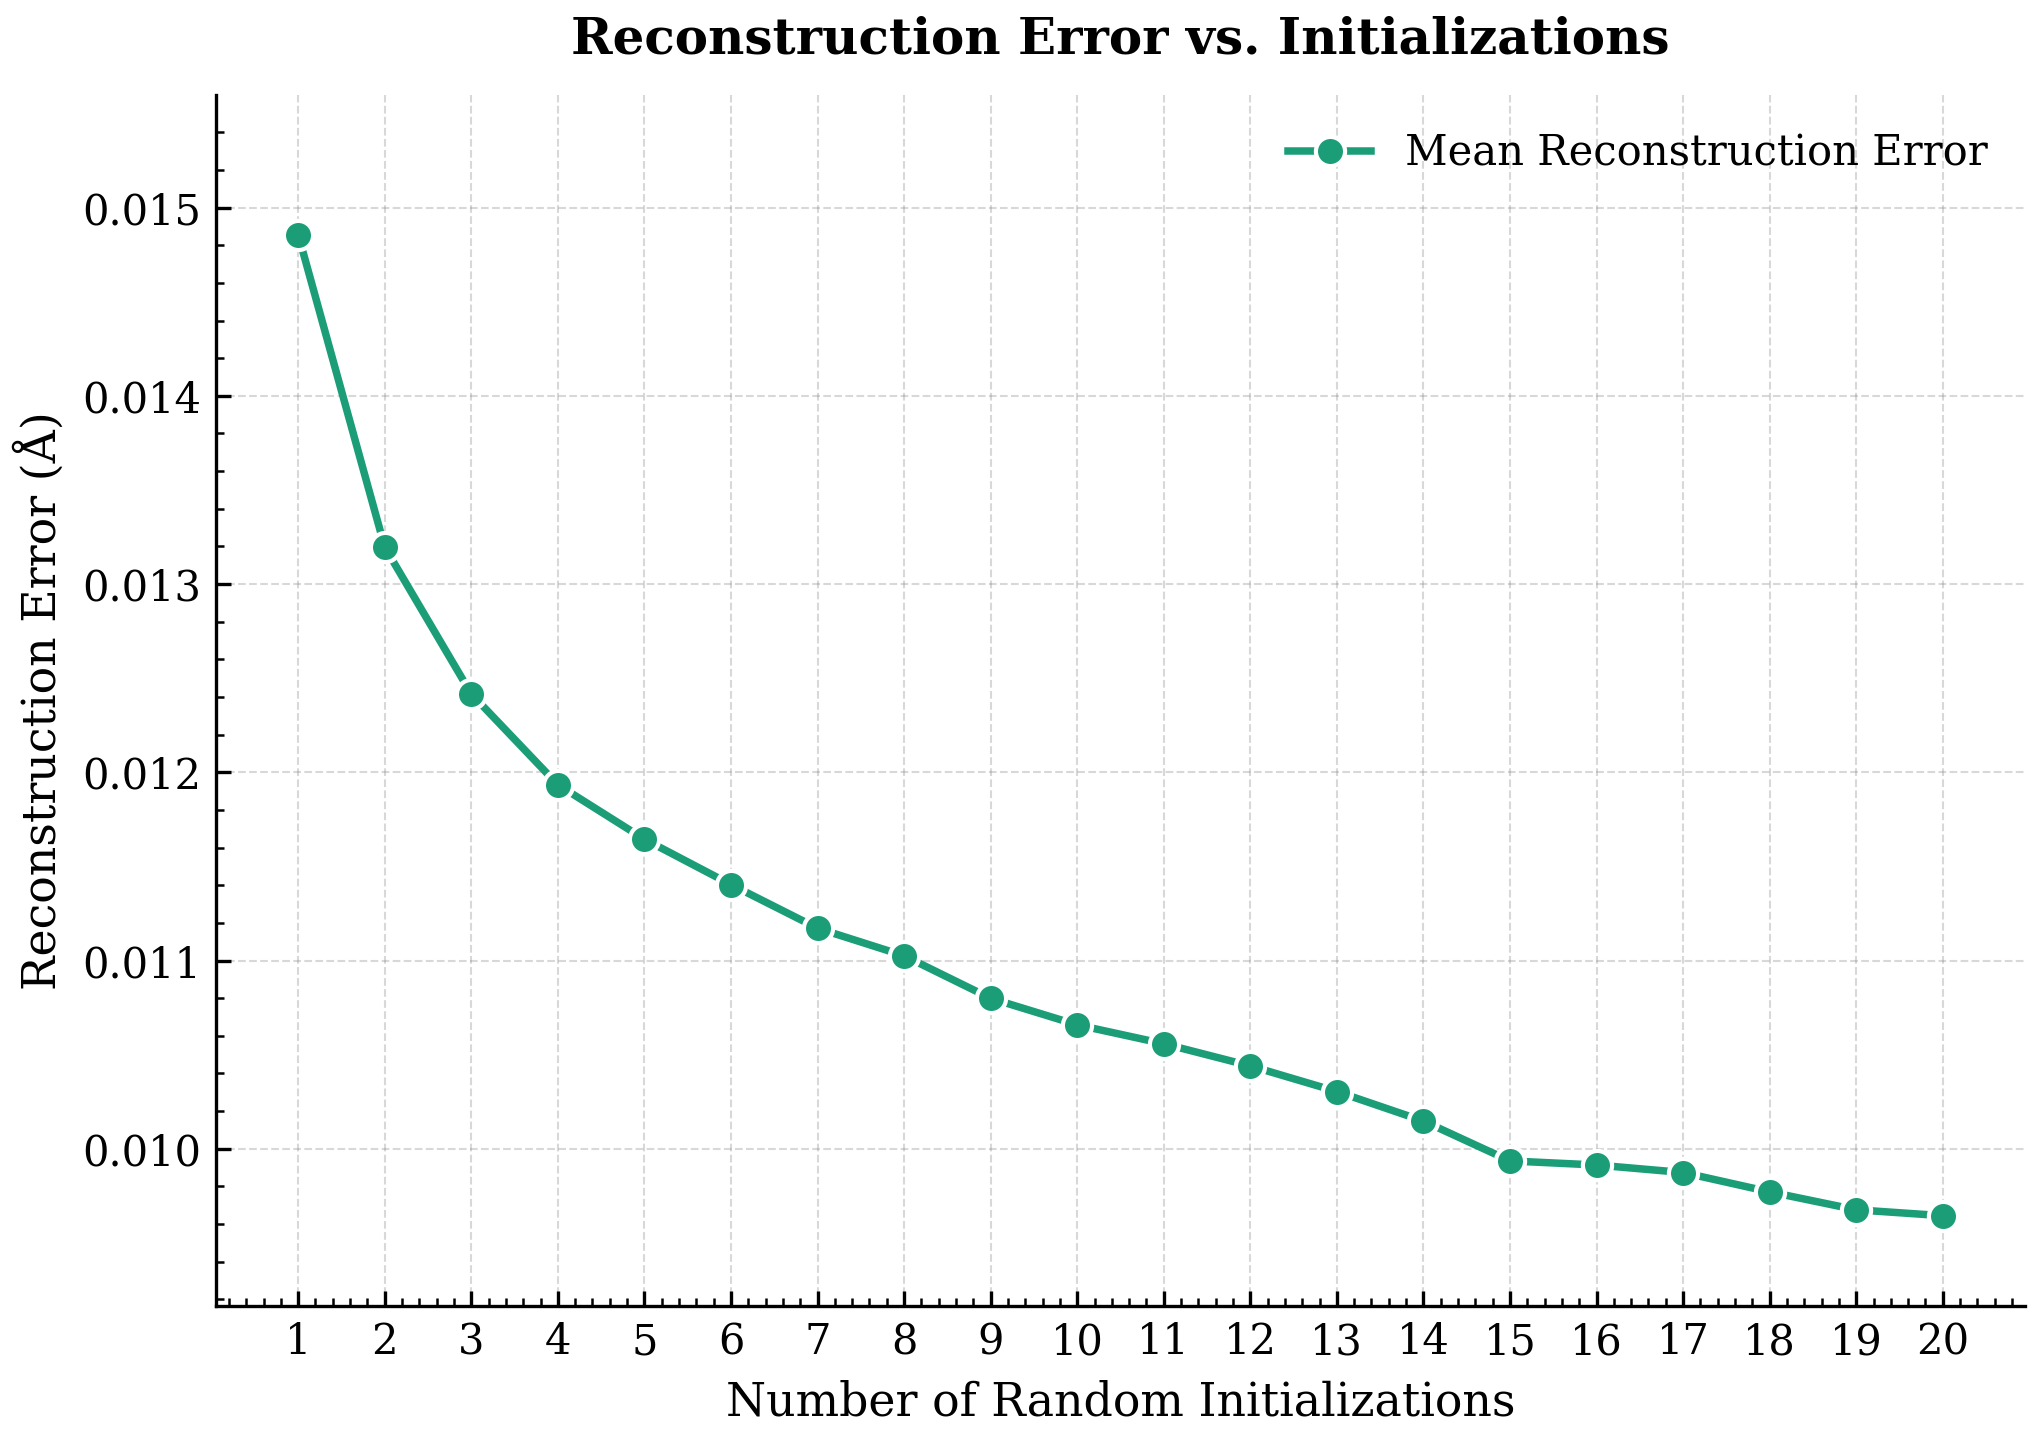

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import warnings

# Temporarily suppress specific runtime warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Set publication-quality plot style
plt.rcParams.update({
    'text.usetex': False,
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman', 'DejaVu Serif', 'Times New Roman'],
    'mathtext.fontset': 'cm',
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.dpi': 300,
    'savefig.dpi': 600,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.6,
    'lines.linewidth': 1.5,
    'lines.markersize': 5,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 3.5,
    'ytick.major.size': 3.5,
    'xtick.minor.size': 2.0,
    'ytick.minor.size': 2.0,
    'axes.axisbelow': True,
    'axes.grid': False,
})

# Define the data
num_points = np.arange(1, 21)  # 1 to 20

# Process the data from the best_alignment_mae_per_init array
mean_errors = np.zeros(20)
valid_counts = np.zeros(20, dtype=int)

for i in range(20):
    # Get valid values (neither NaN nor Inf) for this column
    valid_values = best_alignment_mae_per_init[:, i]
    valid_values = valid_values[np.isfinite(valid_values)]  # Remove both NaN and Inf
    
    valid_counts[i] = len(valid_values)
    
    if len(valid_values) > 0:
        mean_errors[i] = np.mean(valid_values)
    else:
        mean_errors[i] = np.nan

# Create the figure
fig, ax = plt.figure(figsize=(7, 5)), plt.gca()

# Use a colorblind-friendly color
color = '#1b9e77'  # Green from ColorBrewer2.org palette

# Plot only the finite values
mask = np.isfinite(mean_errors)
ax.plot(num_points[mask], mean_errors[mask], marker='o', linestyle='-', 
        linewidth=1.8, markersize=7, markeredgewidth=1.0,
        color=color, markerfacecolor=color, markeredgecolor='white',
        label='Mean Reconstruction Error')

# Enhance axis formatting
ax.grid(True, linestyle='--', alpha=0.3, color='gray', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())

# Format axes
ax.set_xlabel('Number of Random Initializations', fontweight='normal')
ax.set_ylabel('Reconstruction Error (Å)', fontweight='normal')
ax.set_title('Reconstruction Error vs. Initializations', fontweight='bold', pad=10)
ax.set_xticks(num_points)

# Set y-axis limits based on data range
valid_means = mean_errors[mask]
y_min = max(0, np.min(valid_means) * 0.95)  # 5% below minimum value, but not below 0
y_max = np.max(valid_means) * 1.05  # 5% above maximum value
ax.set_ylim(y_min, y_max)

# Add legend
ax.legend(loc='upper right', frameon=False)

# Adjust layout and save
plt.tight_layout()
plt.savefig('reconstruction_error_plot.pdf', dpi=600, bbox_inches='tight')
plt.savefig('reconstruction_error_plot.png', dpi=600, bbox_inches='tight')

plt.show()